In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv('Group_2_data_cleaned.csv')#reading csv file using pandas
df.head()

,Unnamed: 0,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,0,1,-1,1,-1,-1,1,1,1,0,0
1,1,-1,-1,-1,-1,-1,0,1,1,1,1
2,2,1,-1,0,0,-1,0,-1,1,0,1
3,3,1,0,1,-1,-1,0,1,1,0,0
4,4,-1,-1,1,-1,0,0,-1,1,0,1


In [3]:
df=df.drop('Unnamed: 0',axis=1)
df

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split #splitting the data into training ,validation and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)#splitting data into training and testing 

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, stratify=y_train_full, test_size=0.25, random_state=42)#splitting training data into traiing and validation data

In [6]:
from imblearn.over_sampling import SMOTE
X_sampled, y_sampled = SMOTE().fit_resample(X_train,y_train)


In [7]:
classifiers = [
    KNeighborsClassifier(p=1, weights='distance'),
    LogisticRegression(penalty= 'l2', class_weight= 'balanced'),
    SVC(C= 100, gamma= 0.01, kernel= 'rbf'),
    SVC(C= 1000, gamma= 0.01, kernel= 'rbf',probability=True),
    RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62),
    RandomForestClassifier(n_estimators= 70,min_samples_leaf= 2, max_features='sqrt',max_depth= 18),
    RandomForestClassifier(n_estimators= 46,min_samples_leaf= 3, max_features='sqrt',max_depth= 15),
    RandomForestClassifier(n_estimators= 46,min_samples_leaf= 3, max_features='log2',max_depth= 15),
    SVC(kernel="rbf",C=1, gamma=1, probability=True),
    KNeighborsClassifier(weights= 'distance', p= 2, n_neighbors= 1),
    SVC(C= 10, gamma= 0.1, kernel= 'rbf'),
    SVC(kernel="rbf",C=1000, gamma=0.01, probability=True),
    DecisionTreeClassifier(random_state=1),
    RandomForestClassifier(n_estimators= 46, min_samples_split= 2, min_samples_leaf= 2, max_features='sqrt',
                                             max_depth= 18),
    DecisionTreeClassifier(max_depth= 19, max_features= 'auto',min_samples_leaf= 2, min_samples_split= 2),
    DecisionTreeClassifier(random_state=1),
    GradientBoostingClassifier()
    ]


In [8]:
from sklearn.metrics import accuracy_score, precision_score,recall_score
for clf in classifiers:
    clf.fit(X_sampled, y_sampled)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_valid)
    acc = accuracy_score(y_valid, train_predictions)
    print("Accuracy: {:.3%}".format(acc))
    p = precision_score(y_valid, train_predictions,average='weighted')
    print("Precision: {}".format(p))
    r= recall_score(y_valid, train_predictions,average='macro')
    print('Recall: %.3f' %r)

print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 88.561%
Precision: 0.8896003014084195
Recall: 0.889
LogisticRegression
****Results****
Accuracy: 83.026%
Precision: 0.8648498486017004
Recall: 0.808
SVC
****Results****
Accuracy: 88.192%
Precision: 0.8881982760818125
Recall: 0.869
SVC
****Results****
Accuracy: 88.930%
Precision: 0.8953184143112511
Recall: 0.876
RandomForestClassifier
****Results****
Accuracy: 91.144%
Precision: 0.911633002506798
Recall: 0.894
RandomForestClassifier
****Results****
Accuracy: 90.775%
Precision: 0.9077223760995848
Recall: 0.891
RandomForestClassifier
****Results****
Accuracy: 90.406%
Precision: 0.9045016897553367
Recall: 0.888
RandomForestClassifier
****Results****
Accuracy: 91.513%
Precision: 0.9183188947792443
Recall: 0.924
SVC
****Results****
Accuracy: 89.668%
Precision: 0.8967637688799249
Recall: 0.842
KNeighborsClassifier
****Results****
Accuracy: 87.085%
Precision: 0.873175036098187
Recall: 0.850
SVC
****Results****
Accuracy: 89.668%
Precision: 0.896711

In [10]:
clf1=KNeighborsClassifier(p=1, weights='distance')
clf2=LogisticRegression(penalty= 'l2', class_weight= 'balanced')
clf3=SVC(C= 100, gamma= 0.01, kernel= 'rbf')
clf4=SVC(C= 1000, gamma= 0.01, kernel= 'rbf',probability=True)
clf5=RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62)
clf6=RandomForestClassifier(n_estimators= 70,min_samples_leaf= 2, max_features='sqrt',max_depth= 18)
clf7=RandomForestClassifier(n_estimators= 46,min_samples_leaf= 3, max_features='sqrt',max_depth= 15)
clf8=RandomForestClassifier(n_estimators= 46,min_samples_leaf= 3, max_features='log2',max_depth= 15)
clf9=SVC(kernel="rbf",C=1, gamma=1, probability=True)
clf10=KNeighborsClassifier(weights= 'distance', p= 2, n_neighbors= 1)
clf11=SVC(C= 10, gamma= 0.1, kernel= 'rbf')
clf12=SVC(kernel="rbf",C=1000, gamma=0.01, probability=True)
clf13=DecisionTreeClassifier(random_state=1)
clf14=RandomForestClassifier(n_estimators= 46, min_samples_split= 2, min_samples_leaf= 2, max_features='sqrt',
                                             max_depth= 18)
clf15=DecisionTreeClassifier(max_depth= 19, max_features= 'auto',min_samples_leaf= 2, min_samples_split= 2)
clf16=DecisionTreeClassifier(random_state=1)
clf17=GradientBoostingClassifier()
VC = VotingClassifier(estimators=[('clf1', clf1),
                                  ('clf2', clf2),
                                  ('clf3', clf3),
                                  ('clf4',clf4),
                                  ('clf5',clf5),
                                 ('clf6', clf6),
                                 ('clf7', clf7),
                                 ('clf8', clf8),
                                 ('clf9', clf9),
                                 ('clf10', clf10),
                                 ('clf11', clf11),
                                 ('clf12', clf12),
                                 ('clf13', clf13),
                                 ('clf14', clf14),
                                 ('clf15', clf15),
                                 ('clf16', clf16),
                                 ('clf17', clf17)], 
                      voting='hard')
VC.fit(X_sampled, y_sampled)

print('****Results****')
train_predictions = VC.predict(X_valid)
acc = accuracy_score(y_valid, train_predictions)
print("Accuracy: {:.3%}".format(acc))
p = precision_score(y_valid, train_predictions,average='weighted')
print("Precision: {}".format(p))
r= recall_score(y_valid, train_predictions,average='macro')
print('Recall: %.3f' %r)

print("="*30)

****Results****
Accuracy: 92.251%
Precision: 0.9227991565629942
Recall: 0.916


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(f"VC Classification Report on Test data using best model")
cm=confusion_matrix(y_valid, VC.predict(X_valid))
print(cm)
print(classification_report(y_valid, VC.predict(X_valid)), "\n")

VC Classification Report on Test data using best model
[[131   2   8]
 [  1  18   1]
 [  8   1 101]]
              precision    recall  f1-score   support

          -1       0.94      0.93      0.93       141
           0       0.86      0.90      0.88        20
           1       0.92      0.92      0.92       110

    accuracy                           0.92       271
   macro avg       0.90      0.92      0.91       271
weighted avg       0.92      0.92      0.92       271
 



In [12]:
model_best = RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62)

model_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62)

In [13]:
cnf_part2=confusion_matrix(y_valid,model_best.predict(X_valid))
cnf_part2

array([[129,   2,  10],
       [  2,  15,   3],
       [  7,   1, 102]], dtype=int64)

Text(0.5, 1.1, 'Confusion matrix')

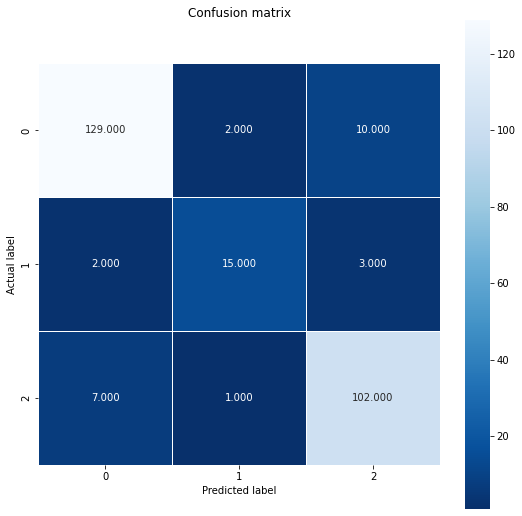

In [14]:
#plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cnf_part2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix', y=1.1)

In [15]:
print(classification_report(y_valid,model_best.predict(X_valid) ))

              precision    recall  f1-score   support

          -1       0.93      0.91      0.92       141
           0       0.83      0.75      0.79        20
           1       0.89      0.93      0.91       110

    accuracy                           0.91       271
   macro avg       0.89      0.86      0.87       271
weighted avg       0.91      0.91      0.91       271

